# HEROES OF PYMOLI - DATA ANALYSIS
---

### BACKGROUND:

Like many others in its genre, the game is free-to-play, but players are encouraged to purchase optional items that enhance their playing experience. As a first task, the company would like you to generate a report that breaks down the game's purchasing data into meaningful insights.

---

### ANALYSIS:
- **576** players purchased **780** in-game items producing **2379.77 USD** in total sales
- Most players that purchased items were **men (84%)** while only a few were **women (14%)**
- Although Pymoli is predominatly men, ***women tend to spend more money*** on average than men, indicating more marketing should be spent on women who could potentially drive more in-game sales.
- Most Pymoli players fell into the age ranges of **20-24 (45%)** followed by **15-19 (19%)** indicating a high school and college audience. These players consume a lot of social media, so we can maximize our ads to be on social. Players have also used these purchases to increase their social status in game. 
- These were to top 3 spenders: ***Lisosia93 (18.96 USD), Idastidru52 (15.45 USD), Chamjask73 (13.83 USD)***. We should send these players thank you notes for their continued support of Pymoli and continue developing new items for these players.
- The **'Final Critic'** drove the most sales (59.99 USD) and largest volume purchased (13)
---

### TABLE OF CONTENTS:
    0. Setup / Dependencies
    1. Player Count
    2. Purchasing Analysis (Total)
    3. Gender Demographics
    4. Purchasing Analysis by Gender
    5. Age Demographics
    6. Purchasing Analysis (Age)
    7. Top Spenders
    8. Most Popular Items
    9. Most Profitable Items
   

## 0. SETUP / DEPENDENCIES
---

In [1]:
# Dependencies and Setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# File to Load
file_path = "Resources/purchase_data.csv"

# Read Purchasing File and store into Pandas data frame
df = pd.read_csv(file_path)

# Preview data frame
df.head()

,Purchase ID,SN,Age,Gender,Item ID,Item Name,Price
0,0,Lisim78,20,Male,108,"Extraction, Quickblade Of Trembling Hands",3.53
1,1,Lisovynya38,40,Male,143,Frenzied Scimitar,1.56
2,2,Ithergue48,24,Male,92,Final Critic,4.88
3,3,Chamassasya86,24,Male,100,Blindscythe,3.27
4,4,Iskosia90,23,Male,131,Fury,1.44


## 1. Player Count
---

In [2]:
# The data is at the 'Purchase ID' level, indicating a player could potentially
# order multiple items, so there may duplicate rows of individual players 
# representing multiple item purchases

# Create a data frame of unique players. 
player_demographics_df = df[['SN', 'Age', 'Gender']].drop_duplicates()

# Find the unique number of total players
total_players = player_demographics_df['SN'].nunique()

# Load total_players into a data frame via Dictionary of lists
total_players_df = pd.DataFrame({"Total Players" : [total_players]})
total_players_df

,Total Players
0,576


## 2. Purchasing Analysis (Total)
---

In [3]:
# Find the Number of Unique Items
unique_items = df['Item ID'].nunique()

# Find the Average Price
avg_price = df['Price'].mean()

# Find the Number of Purchases
purchases = df['Purchase ID'].nunique()

# Find the Total Revenue
total_revenue = df['Price'].sum()

# Put answers from above into a DataFrame using a dictionary of lists
purchasing_analysis_total_df = pd.DataFrame({
    "Number of Unique Items" : [unique_items]
    ,"Average Price" : [avg_price]
    ,"Number of Purchases" : [purchases]
    ,"Total Revenue" : [total_revenue]
    })

# Format data frame
purchasing_analysis_total_df.style.format({
    'Average Price' : '${:.2f}'
    ,'Total Revenue' : '${:.2f}'
    })

,Number of Unique Items,Average Price,Number of Purchases,Total Revenue
0,179,$3.05,780,$2379.77


## 3. Gender Demographics
---

In [4]:
# Find the total count of genders
total_count = player_demographics_df['Gender'].value_counts()

# Find the percentage of players
perc_of_players = player_demographics_df['Gender'].value_counts() / len(player_demographics_df)

# Load series data into a Data Frame via dictionary of series
gender_demographics_df = pd.DataFrame({
    "Total Count" : total_count,
    "Percentage of Players" : perc_of_players
})

# Format data frame
gender_demographics_df.style.format({'Percentage of Players' : '{:.2%}'})

,Total Count,Percentage of Players
Male,484,84.03%
Female,81,14.06%
Other / Non-Disclosed,11,1.91%


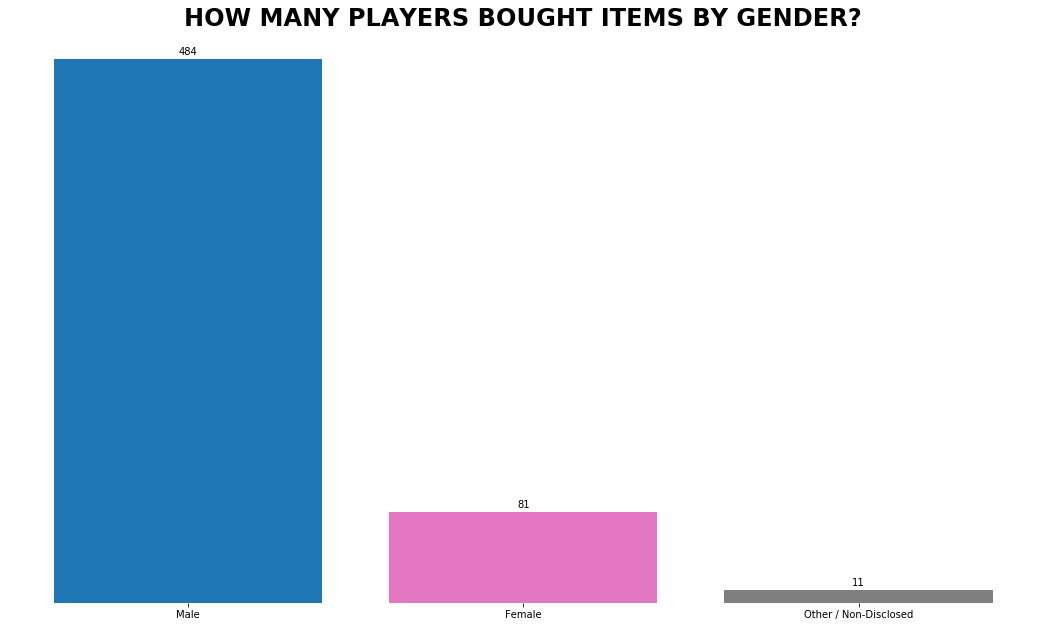

In [5]:
# Visualize Gender Analysis
fig, ax = plt.subplots()

# Set figure size
fig.set_size_inches(18.5, 10.5, forward=True)

# Plot bars
ax.bar(gender_demographics_df.index[0], height=gender_demographics_df['Total Count'][0], color='tab:blue')
ax.bar(gender_demographics_df.index[1], height=gender_demographics_df['Total Count'][1], color='tab:pink')
ax.bar(gender_demographics_df.index[2], height=gender_demographics_df['Total Count'][2], color='tab:gray')

# Add title
ax.set_title("HOW MANY PLAYERS BOUGHT ITEMS BY GENDER?", size=24, weight='bold')  # Add a title to the axes.

# Add value labels to bars
rects = ax.patches
labels= list(gender_demographics_df['Total Count'])

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 2, label, ha='center', va='bottom')


# Clean up graph
ax.set_frame_on(False) # Remove frames 
ax.get_yaxis().set_visible(False) # Remove y-axis ticks

# Display bar graph
plt.show()

# Exprt chart to an image
fig.savefig('images/fig1_gender_analysis.png')


## 4. Purchasing Analysis by Gender
---

In [6]:
# Find the Purchase Count by 'Gender'
purch_count_df = df[['Gender','Purchase ID']] \
    .groupby(by=['Gender']).count() \
    .rename(columns={'Purchase ID':'Purchase Count'})

# Find the Average Purchase Price by 'Gender'
avg_purch_price_by_gender_df = df[['Gender', 'Price']] \
    .groupby(by='Gender').mean() \
    .rename(columns={"Price" : "Average Purchase Price"})

# Find the Total Purchase Value by 'Gender'
total_purch_value_by_gender_df = df[['Gender', 'Price']] \
    .groupby(by='Gender').sum() \
    .rename(columns={'Price':'Total Purchase Value'})

# Find the Avg Total Purchase per Person
avg_total_purch_per_person = total_purch_value_by_gender_df['Total Purchase Value'] / gender_demographics_df["Total Count"]
avg_total_purch_per_person_df = pd.DataFrame(avg_total_purch_per_person,columns=['Avg Total Purchase per Person'])

# Concat all data frames into one summary dataframe
purch_analysis_gender_df = pd.concat([purch_count_df 
                                     ,avg_purch_price_by_gender_df
                                     ,total_purch_value_by_gender_df 
                                     ,avg_total_purch_per_person_df
                                     ]
                                     ,axis=1
                                     )

# Format the data frame
purch_analysis_gender_df.style.format({
            'Average Purchase Price' : '${:.2f}'
            ,'Total Purchase Value' : '${:.2f}'
            ,'Avg Total Purchase per Person' : '${:.2f}'
})

,Purchase Count,Average Purchase Price,Total Purchase Value,Avg Total Purchase per Person
Gender,,,,
Female,113,$3.20,$361.94,$4.47
Male,652,$3.02,$1967.64,$4.07
Other / Non-Disclosed,15,$3.35,$50.19,$4.56


## 5. Age Demographics
---

In [24]:
# Setup bins and labels for grouping age ranges
bins = [0,10,15,20,25,30,35,40, float('inf')]
age_range_labels = ['<10', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40+']

# Create a series of binned ages
total_count_bins = pd.cut(player_demographics_df['Age']
                          ,bins=bins
                          ,labels=age_range_labels
                          ,right=False
                          ) \
                          .value_counts()

# Find the Total Count of players
age_demo_df = pd.DataFrame(total_count_bins) \
    .sort_index() \
    .rename(columns={'Age': 'Total Count'})

# Find the percentage of players in bins (total count / percentage of players)
age_demo_df['Percentage of Players'] = (age_demo_df / len(player_demographics_df))

# Format dataframe
age_demo_df.style.format({'Percentage of Players' : '{:.2%}'})

,Total Count,Percentage of Players
<10,17,2.95%
10-14,22,3.82%
15-19,107,18.58%
20-24,258,44.79%
25-29,77,13.37%
30-34,52,9.03%
35-39,31,5.38%
40+,12,2.08%


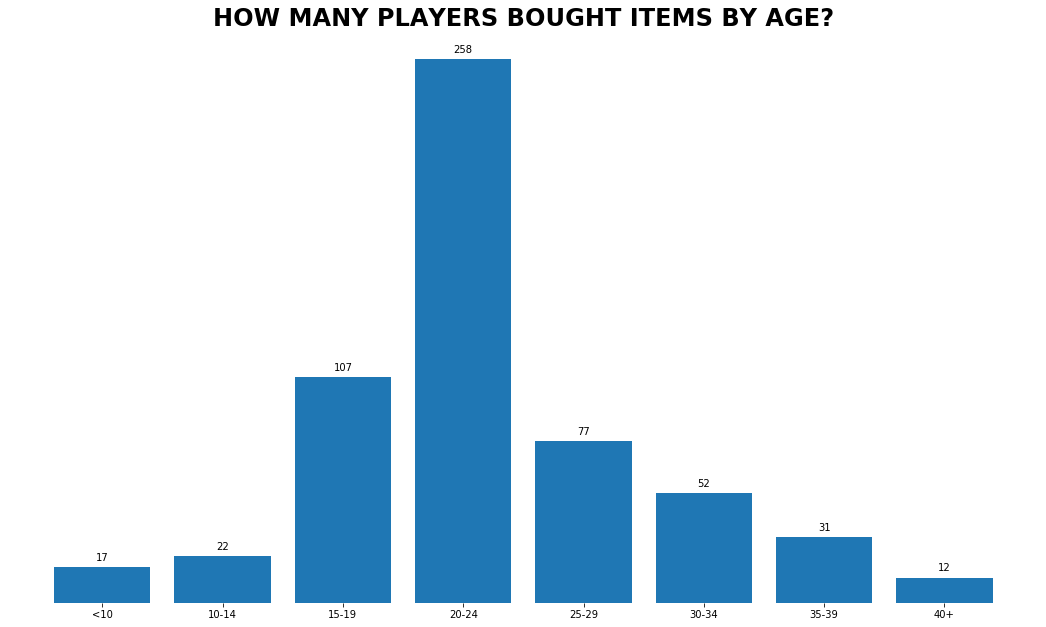

In [25]:
# Visualize Age Analysis
fig, ax = plt.subplots()

fig.set_size_inches(18.5, 10.5, forward=True)

# Plot bars
ax.bar(age_demo_df.index, height=age_demo_df['Total Count'], color='tab:blue')

# Set labels
# ax.set_xlabel(xlabel='GENDER', size=12) # Add x-axis label
# ax.set_ylabel(ylabel='# OF PLAYERS', size=12) # Add y-axis label
ax.set_title("HOW MANY PLAYERS BOUGHT ITEMS BY AGE?", size=24, weight='bold')  # Add a title to the axes.

# Clean up graph
ax.set_frame_on(False) # Remove frames to reduce ink
ax.get_yaxis().set_visible(False)

# Label the bars with their corresponding values
rects = ax.patches
labels = list(age_demo_df['Total Count'])

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 2, label, ha='center', va='bottom')
    
    
# Display bar graph
plt.show()

# Exprt chart to an image
fig.savefig('images/fig2_age_analysis.png')

## 6. Purchasing Analysis (Age)
---

In [28]:
# Add 'Age Range' to original data frame
age_range = pd.cut(df['Age'], bins=bins, labels=age_range_labels, right=False)
age_range_df = df
age_range_df['Age Range'] = age_range

# Find the Purchase Count by 'Age Range'
purch_count_by_age_df = age_range_df[['Age Range', 'Purchase ID']] \
    .groupby(by=['Age Range']).count() \
    .rename(columns={'Purchase ID' : 'Purchase Count'})

# Find the Average Purchase Price by 'Age Range'
avg_purch_price_by_age_df = age_range_df[['Age Range', 'Price']] \
    .groupby(by=['Age Range']).mean() \
    .rename(columns={'Price' : 'Avg Purchase Price'})

# Find the Total Purchase Value by 'Age Range'
total_purch_value_by_age_df = age_range_df[['Age Range', 'Price']] \
    .groupby(by=['Age Range']).sum() \
    .rename(columns={'Price' : 'Total Purchase Value'}, inplace=True)

# Find the Avg Total Purchase per Person
avg_total_purch_per_person_by_age_df = age_range_df[['Age Range', 'SN','Price']] \
    .groupby(by=['Age Range', 'SN']).sum() \
    .groupby(by=['Age Range']).mean() \
    .rename(columns={'Price' : 'Avg Total Purchase per Person'})

# Put all answers into a data frame
purch_analysis_age_df = pd.concat([purch_count_by_age_df
                                   ,avg_purch_price_by_age_df 
                                   ,total_purch_value_by_age_df 
                                   ,avg_total_purch_per_person_by_age_df
                                   ] 
                                   ,axis=1
                                   )

# Format data frame
purch_analysis_age_df.style.format({
    'Avg Purchase Price' : '${:.2f}'
    ,'Total Purchase Value' : '${:.2f}'
    ,'Avg Total Purchase per Person' : '${:.2f}'
})

,Purchase Count,Avg Purchase Price,Avg Total Purchase per Person
Age Range,,,
<10,23,$3.35,$4.54
10-14,28,$2.96,$3.76
15-19,136,$3.04,$3.86
20-24,365,$3.05,$4.32
25-29,101,$2.90,$3.81
30-34,73,$2.93,$4.12
35-39,41,$3.60,$4.76
40+,13,$2.94,$3.19


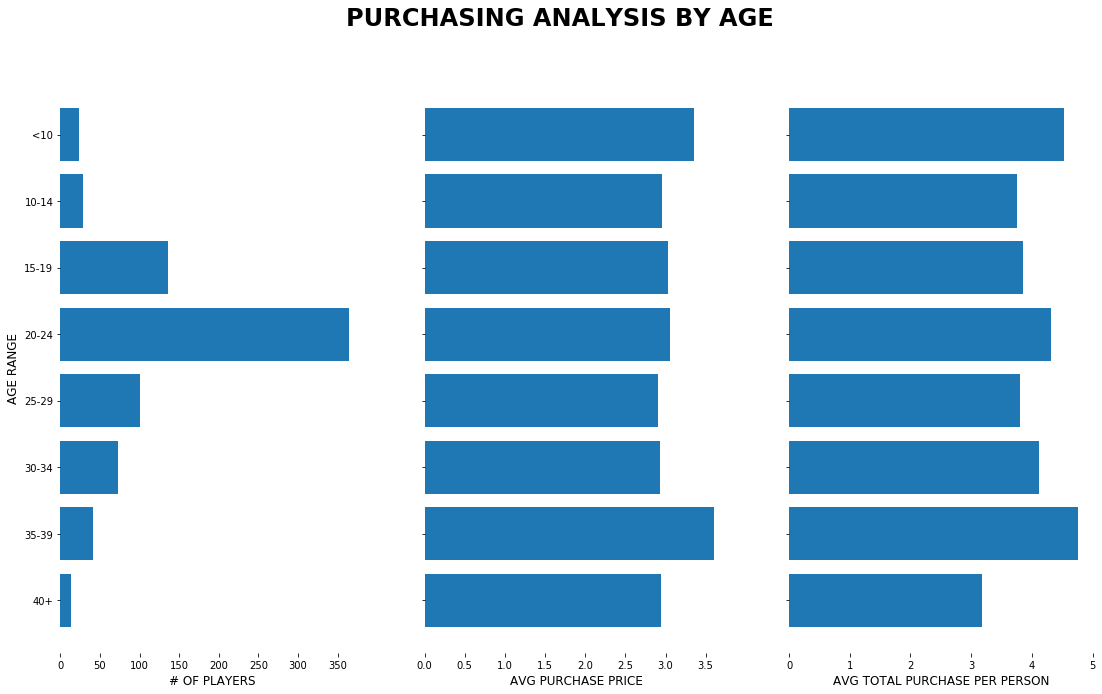

In [29]:
purch_analysis_age_df.sort_index(ascending=False, inplace=True)

# Visualize Age Analysis
fig, (ax1, ax2, ax3) = plt.subplots(1,3, sharey=True)

# Set size of figure
fig.set_size_inches(18.5, 10.5, forward=True)
fig.suptitle('PURCHASING ANALYSIS BY AGE', fontsize=24, weight='bold')

# Plot bars
ax1.barh(purch_analysis_age_df.index, width=purch_analysis_age_df['Purchase Count'])
ax2.barh(purch_analysis_age_df.index, width=purch_analysis_age_df['Avg Purchase Price'])
ax3.barh(purch_analysis_age_df.index, width=purch_analysis_age_df['Avg Total Purchase per Person'])

# Set labels
# ax1.set_title("HOW MANY PLAYERS BOUGHT ITEM BY AGE?", size=12, weight='bold')  # Add a title to the axes.
ax1.set_ylabel(ylabel='AGE RANGE', size=12) # Add y-axis label
ax1.set_xlabel(xlabel='# OF PLAYERS', size=12) # Add x-axis label
ax2.set_xlabel(xlabel='AVG PURCHASE PRICE', size=12)
ax3.set_xlabel(xlabel='AVG TOTAL PURCHASE PER PERSON', size=12)

# Clean up graph
ax1.set_frame_on(False) # Remove frames to reduce ink
ax2.set_frame_on(False) # Remove frames to reduce ink
ax3.set_frame_on(False) # Remove frames to reduce ink

# Display bar graph
plt.show()

# Exprt chart to an image
fig.savefig('images/fig3_age_analysis_2.png')

## 7. TOP SPENDERS
---

In [30]:
# Find the Purchase Count by 'SN'
purch_count_by_sn_df = df[['SN', 'Purchase ID']] \
    .groupby(by=['SN']).count() \
    .rename(columns={'Purchase ID' : 'Purchase Count'})

# Find the Avg Purchase Price by 'SN'
avg_price_by_sn_df = df[['SN', 'Price']] \
    .groupby(by=['SN']).mean() \
    .rename(columns={'Price' : 'Avg Purchase Price'})

# Find the Total Purchase Value by 'SN'
total_purch_value_by_sn_df = df[['SN', 'Price']] \
    .groupby(by=['SN']).sum() \
    .rename(columns={'Price' : 'Total Purchase Value'})

# Load data into summary data frame
top_spender_df = pd.concat([purch_count_by_sn_df
                            ,avg_price_by_sn_df
                            ,total_purch_value_by_sn_df
                            ]
                            ,axis=1
                            )

# Sort data frame on 'Total Purchase Value' in descending order
top_spender_df.sort_values(by=['Total Purchase Value'], ascending=False, inplace=True)

# Format data frame
top_spender_df.head(10).style.format({
    'Avg Purchase Price' : '${:0.2f}'
    ,'Total Purchase Value' : '${:0.2f}'
})

,Purchase Count,Avg Purchase Price,Total Purchase Value
SN,,,
Lisosia93,5,$3.79,$18.96
Idastidru52,4,$3.86,$15.45
Chamjask73,3,$4.61,$13.83
Iral74,4,$3.40,$13.62
Iskadarya95,3,$4.37,$13.10
Ilarin91,3,$4.23,$12.70
Ialallo29,3,$3.95,$11.84
Tyidaim51,3,$3.94,$11.83
Lassilsala30,3,$3.84,$11.51


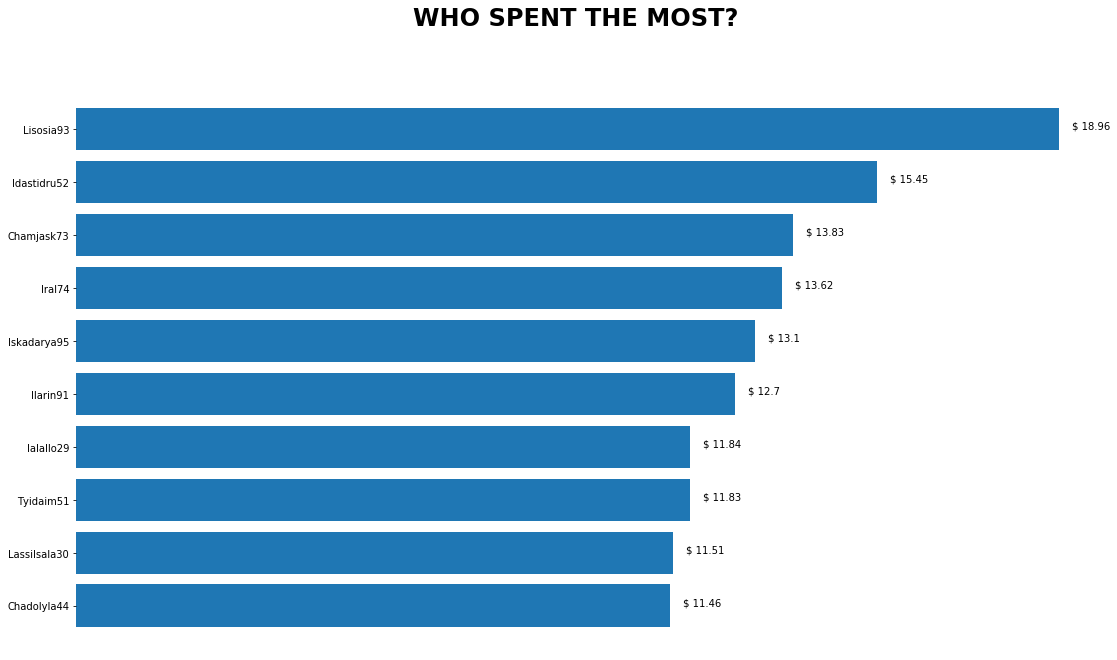

In [31]:
top_10_spenders_df = top_spender_df.head(10).sort_values(by='Total Purchase Value')

# Visualize Age Analysis
fig,ax = plt.subplots()

# Set size of figure
fig.set_size_inches(18.5, 10.5, forward=True)
fig.suptitle('WHO SPENT THE MOST?', fontsize=24, weight='bold')

# Plot bars
ax.barh(top_10_spenders_df.index, width=top_10_spenders_df['Total Purchase Value'])

# Set axis labels
# ax.set_ylabel(ylabel='SN', size=12) # Add y-axis label
ax.set_xlabel(xlabel='Total Purchase Value', size=12) # Add x-axis label


# Label the bars with their corresponding values
rects = ax.patches
labels = list(top_10_spenders_df['Total Purchase Value'])
for rect, label in zip(rects, labels):
    width = rect.get_width()
    ax.text(width + .25, rect.get_y() + rect.get_height() / 2, f'$ {round(label,2)}')
    
# Clean up graph
ax.set_frame_on(False) # Remove frames to reduce ink
ax.get_xaxis().set_visible(False)


# Display bar graph
plt.show()

# Export chart to an image
fig.savefig('images/fig4_top_spenders.png')

## 8. MOST POPULAR ITEMS
---

In [32]:
# Find the Purchase Count by Item ID
purch_count_by_item_df = df[['Item ID', 'Item Name', 'Purchase ID']] \
    .groupby(by=['Item ID', 'Item Name']).count() \
    .rename(columns={'Purchase ID' : 'Purchase Count'})

# Find the Item Price by Item ID
item_price_by_item_df = df[['Item ID', 'Item Name', 'Price']] \
    .groupby(by=['Item ID', 'Item Name']).max() \
    .rename(columns={'Price' : 'Item Price'})

# Find the Total Purchase Value by Item ID
total_purch_value_by_item_df = df[['Item ID', 'Item Name', 'Price']] \
    .groupby(by=['Item ID', 'Item Name']).sum() \
    .rename(columns={'Price' : 'Total Purchase Value'})

# Load in summary data frame
most_pop_items_df = pd.concat([
    purch_count_by_item_df
    ,item_price_by_item_df
    ,total_purch_value_by_item_df
    ]
    ,axis=1
    )

# Sort data frame in descending order by 'Purchase Count'
most_pop_items_df.sort_values('Purchase Count', ascending=False, inplace=True) 

# Format data frame
most_pop_items_df.head(10).style.format({
    'Item Price' : '${:.2f}'
    ,'Total Purchase Value' : '${:.2f}'
    })

,,Purchase Count,Item Price,Total Purchase Value
Item ID,Item Name,,,
92,Final Critic,13,$4.88,$59.99
178,"Oathbreaker, Last Hope of the Breaking Storm",12,$4.23,$50.76
145,Fiery Glass Crusader,9,$4.58,$41.22
132,Persuasion,9,$3.33,$28.99
108,"Extraction, Quickblade Of Trembling Hands",9,$3.53,$31.77
82,Nirvana,9,$4.90,$44.10
75,Brutality Ivory Warmace,8,$2.42,$19.36
103,Singed Scalpel,8,$4.35,$34.80
34,Retribution Axe,8,$2.22,$17.76


In [33]:
top_10_items = most_pop_items_df.reset_index('Item ID')['Purchase Count'].sort_values(ascending=False)

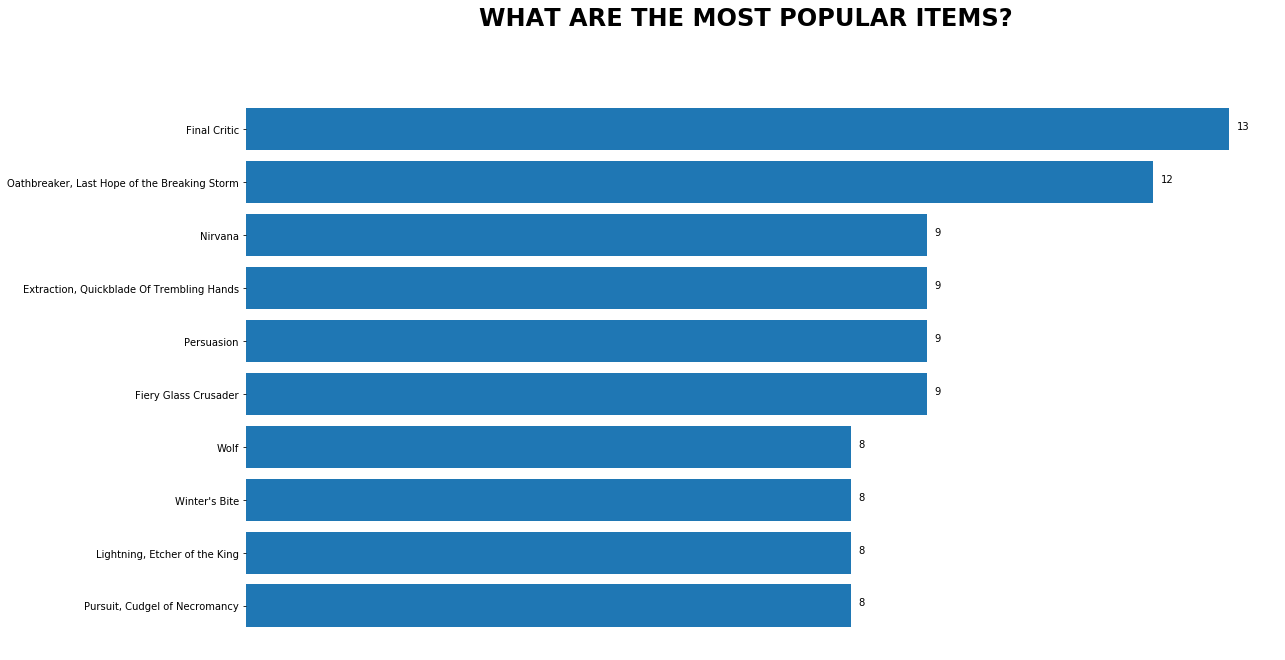

In [34]:
top_10_items = most_pop_items_df.reset_index('Item ID')['Purchase Count'].sort_values(ascending=False).head(10).sort_values()

fig,ax = plt.subplots()

# Set size of figure
fig.set_size_inches(18.5, 10.5, forward=True)

# Set graph title
fig.suptitle('WHAT ARE THE MOST POPULAR ITEMS?', fontsize=24, weight='bold')

# Plot bars
ax.barh(top_10_items.index, width=top_10_items)

# Label the bars with their corresponding values
rects = ax.patches
labels = list(top_10_items)
for rect, label in zip(rects, labels):
    width = rect.get_width()
    ax.text(width + .1, rect.get_y() + rect.get_height() / 2, label)
    
# Clean up graph
ax.set_frame_on(False) # Remove frames to reduce ink
ax.get_xaxis().set_visible(False)

# Display bar graph
plt.show()

# Export chart to an image
fig.savefig('images/fig5_popular_items.png')

## 9. MOST PROFITABLE ITEMS
---

In [35]:
# Sort most_pop_items_df by 'Total Purchase Value'
most_profit_items_df = most_pop_items_df.sort_values('Total Purchase Value', ascending=False)
most_profit_items_df.head(10).style.format({
    'Item Price' : '${:.2f}'
    ,'Total Purchase Value' : '${:.2f}'
    })

,,Purchase Count,Item Price,Total Purchase Value
Item ID,Item Name,,,
92,Final Critic,13,$4.88,$59.99
178,"Oathbreaker, Last Hope of the Breaking Storm",12,$4.23,$50.76
82,Nirvana,9,$4.90,$44.10
145,Fiery Glass Crusader,9,$4.58,$41.22
103,Singed Scalpel,8,$4.35,$34.80
59,"Lightning, Etcher of the King",8,$4.23,$33.84
108,"Extraction, Quickblade Of Trembling Hands",9,$3.53,$31.77
78,"Glimmer, Ender of the Moon",7,$4.40,$30.80
72,Winter's Bite,8,$3.77,$30.16


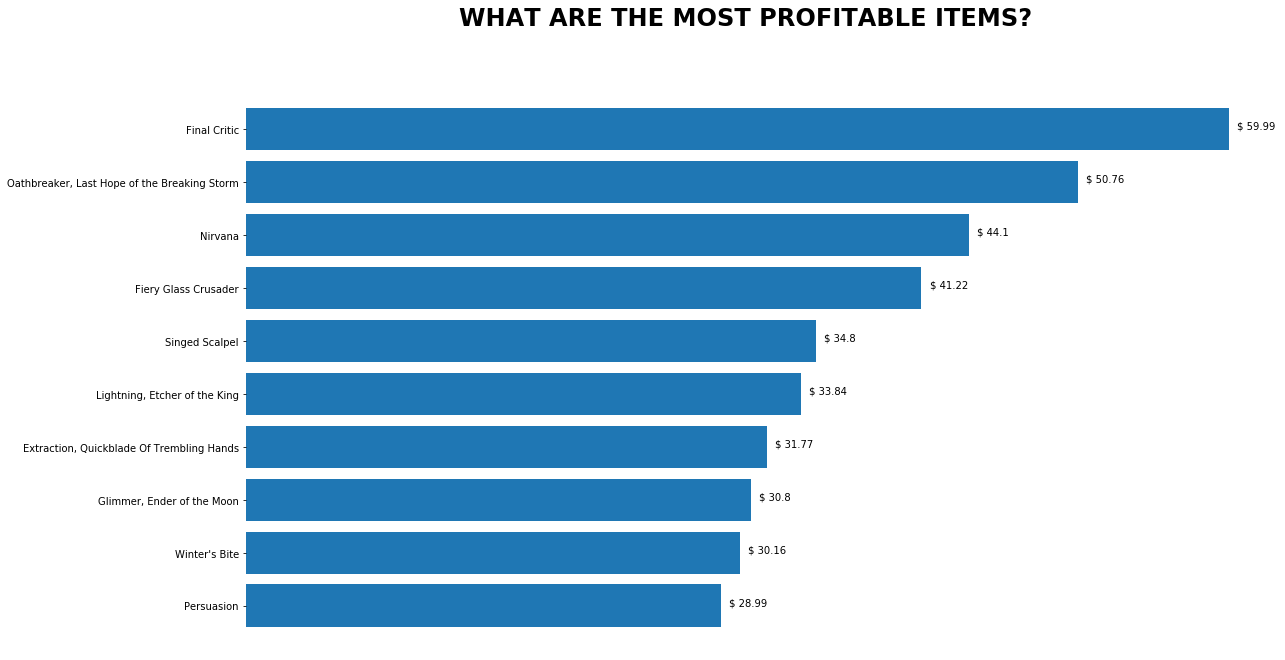

In [36]:
top_10_profitable_items = most_profit_items_df.reset_index('Item ID')['Total Purchase Value'].sort_values(ascending=False).head(10).sort_values()

fig,ax = plt.subplots()

# Set size of figure
fig.set_size_inches(18.5, 10.5, forward=True)

# Set graph title
fig.suptitle('WHAT ARE THE MOST PROFITABLE ITEMS?', fontsize=24, weight='bold')

# Plot bars
ax.barh(top_10_profitable_items.index, width=top_10_profitable_items)

# Label the bars with their corresponding values
rects = ax.patches
labels = list(top_10_profitable_items)
for rect, label in zip(rects, labels):
    width = rect.get_width()
    ax.text(width + .5, rect.get_y() + rect.get_height() / 2, f'$ {round(label,2)}')
    
# Clean up graph
ax.set_frame_on(False) # Remove frames to reduce ink
ax.get_xaxis().set_visible(False)

# Display bar graph
plt.show()

# Export chart to an image
fig.savefig('images/fig6_profitable_items.png')